<a href="https://colab.research.google.com/github/plubberrs/Drone/blob/main/SMTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialising

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
total_mass = 0.335 # unit kg
lift_to_weight_ratio = 1
total_lift = total_mass * lift_to_weight_ratio * 9.81 # unit N
lift_per_propeller = total_lift / 4
print(total_lift)

3.2863500000000005


In [ ]:
print(lift_per_propeller)

0.8215875000000001


$$L = \frac{\pi}{128} C_L n \rho \omega^2 R^4$$

In [ ]:
C_L = 0.2 # dimensionless
n = 2 #number of blades in one propeller
density = 1.275 # unit kg/m^3
radius = 0.15 # unit m
omega = np.sqrt((128 * lift_per_propeller) / (C_L * n * density * np.pi * (radius**4)))
print(omega)

360.0720023894692


In [ ]:
rpm = (omega * 60) / (2 * np.pi)
print(rpm)

3438.4343429568466


In [ ]:
time_limit = 10

# Part 2



1 clockwise
2 counter
3 counter
4 clockwise

In [ ]:
omega1, omega2, omega3, omega4 = np.zeros(time_limit * 1000), np.zeros(time_limit * 1000), np.zeros(time_limit * 1000), np.zeros(time_limit * 1000)
omega1[0] = omega
omega2[0] = omega
omega3[0] = omega
omega4[0] = omega

In [ ]:
def find_lift(omegatest):
  return (np.pi / 128) * C_L * n * density * (omegatest**2) * (radius**4)

In [ ]:
L1, L2, L3, L4 = np.zeros(time_limit * 1000), np.zeros(time_limit * 1000), np.zeros(time_limit * 1000), np.zeros(time_limit * 1000)
L1[0] = find_lift(omega1[0])
L2[0] = find_lift(omega2[0])
L3[0] = find_lift(omega3[0])
L4[0] = find_lift(omega4[0])

In [ ]:
L_total = np.zeros(time_limit * 1000)
L_total[0] = L1[0] + L2[0] + L3[0] + L4[0]

In [ ]:
L_front = np.zeros(time_limit * 1000)
L_front[0] = L1[0] + L2[0]

L_back = np.zeros(time_limit * 1000)
L_back[0] = L3[0] + L4[0]

L_left = np.zeros(time_limit * 1000)
L_left[0] = L1[0] + L3[0]

L_right = np.zeros(time_limit * 1000)
L_right[0] = L2[0] + L4[0]

In [ ]:
np.sqrt((1.38/2)**2 + (0.81/2)**2)

0.8000781211856752

In [ ]:
drone_radius = 0.8 #unit m

In [ ]:
moment_of_inertia = (1/12) * total_mass * (drone_radius**2)
print(moment_of_inertia) # unit kgm^2

0.01786666666666667


# Drone tilting angle (polar angle)
define $\theta$ as tilting angle \
model:
$$\theta(t) = \theta_{f}(1 - e^{-(\frac{t}{a})^b})$$

where $a = 0.5, b = 4$

$$\omega(t) = \theta'(t)$$

$$\alpha(t) = \theta''(t)$$



In [ ]:
pitch_accel = float(input("pitch acceleration = ")) # unit m/s^2
theta_final = np.arcsin(pitch_accel / (total_lift / total_mass))
print(np.rad2deg(theta_final))

pitch acceleration = 5
30.642783162867556


In [ ]:
theta = np.zeros(int(3 * 1000))
dtheta_dt = np.zeros(int(3 * 1000))
d2theta_dt2 = np.zeros(int(3 * 1000))
t=0
while t < 3:
  theta[int(t*1000)] = theta_final * (1 - np.exp(-(t/0.5)**4))

  if t==0:
    pass
  else:
    dtheta = theta[int(t*1000)] - theta[int(t*1000) - 1]
    dtheta_dt[int(t*1000)] = dtheta/0.01

  if t==0:
    pass
  else:
    d2theta = dtheta_dt[int(t*1000)] - dtheta_dt[int(t*1000) - 1]
    d2theta_dt2[int(t*1000)] = d2theta/0.01

  t += 0.001

# fill up to time limit
theta = np.concatenate((theta, np.full((time_limit - 3) * 1000, theta[-1])), axis=None)
dtheta_dt = np.concatenate((dtheta_dt, np.full((time_limit - 3) * 1000, dtheta_dt[-1])), axis=None)
d2theta_dt2 = np.concatenate((d2theta_dt2, np.full((time_limit - 3) * 1000, d2theta_dt2[-1])), axis=None)

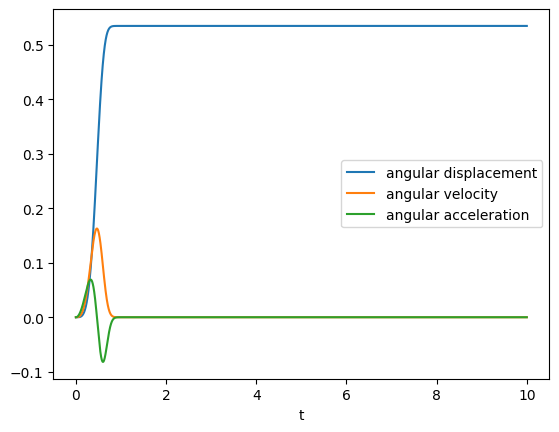

In [ ]:
t = np.linspace(0, time_limit, int(time_limit * 1000))

plt.plot(t, theta, label = "angular displacement")
plt.plot(t, dtheta_dt, label = "angular velocity")
plt.plot(t, d2theta_dt2, label = "angular acceleration")


plt.xlabel("t")
plt.legend()


plt.savefig("fig3.png")

In [ ]:
torque = moment_of_inertia * d2theta_dt2


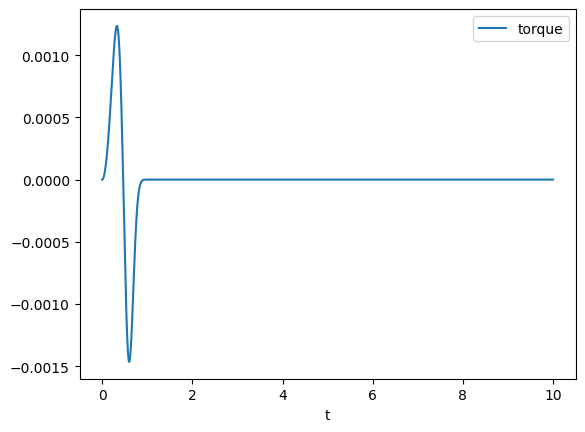

In [ ]:
plt.plot(t, torque, label = "torque")
plt.xlabel("t")
plt.legend()
plt.show()

# Pitch

define positive torque on the whole of drone as counterclockwise

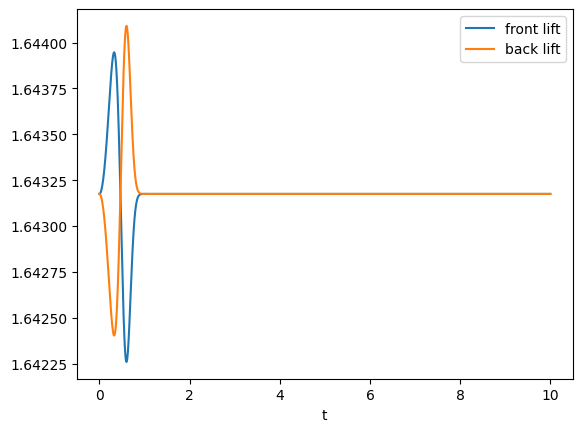

In [ ]:
L_front = ((torque / 2) / drone_radius) + L_front[0]
L_back = L_back[0] - ((torque / 2) / drone_radius)

plt.plot(t, L_front, label = "front lift")
plt.plot(t, L_back, label = "back lift")
plt.xlabel("t")
plt.legend()
plt.show()


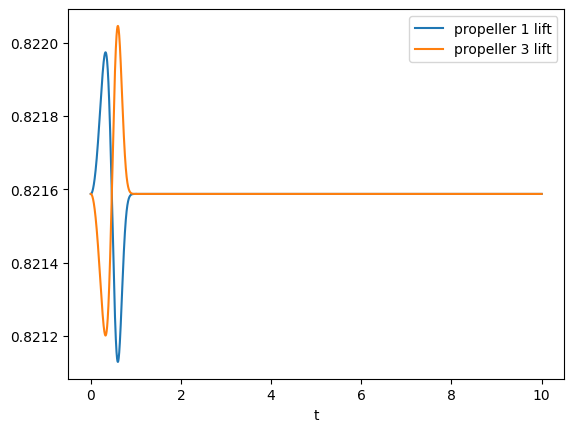

In [ ]:
L1, L2 = (L_front / 2), (L_front / 2)
L3, L4 = (L_back / 2), (L_back / 2)

plt.plot(t, L1, label = "propeller 1 lift")
plt.plot(t, L3, label = "propeller 3 lift")
plt.xlabel("t")
plt.legend()
plt.show()

In [ ]:
def find_omega_from_L(Ltest):
  return np.sqrt((128 * Ltest) / (C_L * n * density * np.pi * (radius**4)))

In [ ]:
def omega_to_rpm(omegatest):
  return (omegatest * 60) / (2 * np.pi)

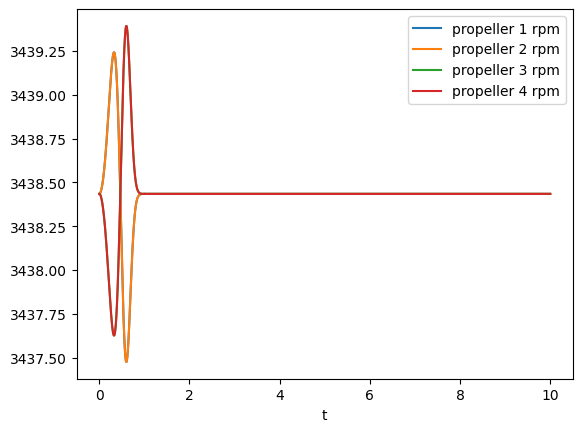

In [ ]:
omega1 = find_omega_from_L(L1)
rpm1 = omega_to_rpm(omega1)
omega2 = find_omega_from_L(L2)
rpm2 = omega_to_rpm(omega2)
omega3 = find_omega_from_L(L3)
rpm3 = omega_to_rpm(omega3)
omega4 = find_omega_from_L(L4)
rpm4 = omega_to_rpm(omega4)

plt.plot(t, rpm1, label = "propeller 1 rpm")
plt.plot(t, rpm2, label = "propeller 2 rpm")
plt.plot(t, rpm3, label = "propeller 3 rpm")
plt.plot(t, rpm4, label = "propeller 4 rpm")
plt.xlabel("t")
plt.legend()
plt.show()

In [ ]:
print(np.max(omega1))
print(np.max(omega1) - omega1[0])

360.1565835574451
0.08458116797595494


# Roll

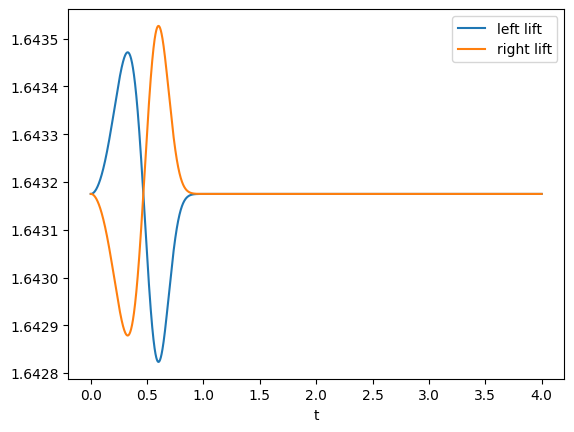

In [ ]:
L_left = ((torque / 2) / drone_radius) + L_left[0]
L_right = L_right[0] - ((torque / 2) / drone_radius)

L1, L3 = (L_left / 2), (L_left / 2)
L2, L4 = (L_right / 2), (L_right / 2)

plt.plot(t, L_left, label = "left lift")
plt.plot(t, L_right, label = "right lift")
plt.xlabel("t")
plt.legend()
plt.show()

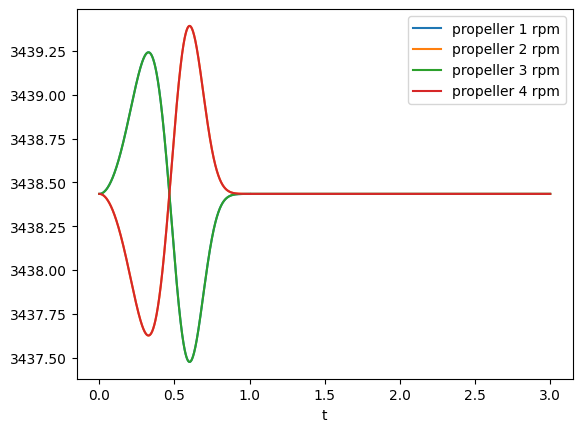

In [ ]:
omega1 = find_omega_from_L(L1)
rpm1 = omega_to_rpm(omega1)
omega2 = find_omega_from_L(L2)
rpm2 = omega_to_rpm(omega2)
omega3 = find_omega_from_L(L3)
rpm3 = omega_to_rpm(omega3)
omega4 = find_omega_from_L(L4)
rpm4 = omega_to_rpm(omega4)

plt.plot(t, rpm1, label = "propeller 1 rpm")
plt.plot(t, rpm2, label = "propeller 2 rpm")
plt.plot(t, rpm3, label = "propeller 3 rpm")
plt.plot(t, rpm4, label = "propeller 4 rpm")
plt.xlabel("t")
plt.legend()
plt.show()

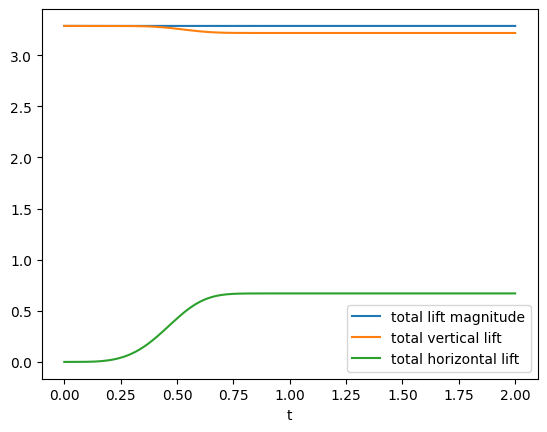

In [ ]:
L_total = L1 + L2 + L3 + L4

L_vertical = L_total * np.cos(theta)
L_horizontal = L_total * np.sin(theta)

plt.plot(t, L_total, label = "total lift magnitude")
plt.plot(t, L_vertical, label = "total vertical lift")
plt.plot(t, L_horizontal, label = "total horizontal lift")
plt.xlabel("t")
plt.legend()
plt.show()

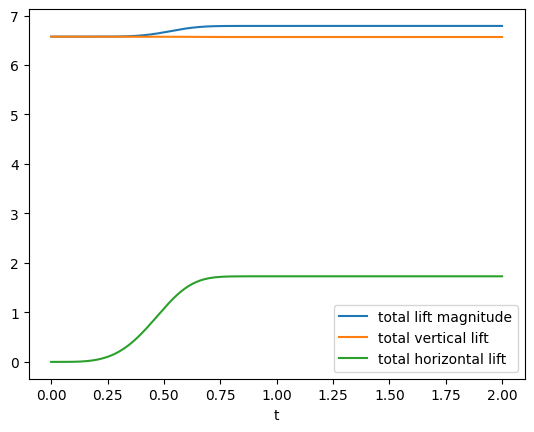

In [ ]:
L1, L2, L3, L4, L_front, L_back, L_total, L_vertical, L_horizontal = correct_lift(L1, L2, L3, L4, L_total)

plt.plot(t, L_total, label = "total lift magnitude")
plt.plot(t, L_vertical, label = "total vertical lift")
plt.plot(t, L_horizontal, label = "total horizontal lift")
plt.xlabel("t")
plt.legend()
plt.show()

# Yaw

In [ ]:
dphi_dt_final = float(input("yaw angular velocity = ")) # unit rad/s
print(np.rad2deg(dphi_dt_final))

yaw angular velocity = 2
114.59155902616465


In [ ]:
phi = np.zeros(time_limit * 1000)
dphi_dt = np.zeros(time_limit * 1000)
d2phi_dt2 = np.zeros(time_limit * 1000)
t=0

while t < time_limit:
  dphi_dt[int(t*1000)] = dphi_dt_final * (1 - np.exp(-(t/0.5)**4))

  if t==0:
    pass
  else:
    d2phi = dphi_dt[int(t*1000)] - dphi_dt[int(t*1000) - 1]
    d2phi_dt2[int(t*1000)] = d2phi/0.01

  phi[int(t*1000)] = np.sum(dphi_dt) * 0.001

  t += 0.001

# to fix for time_limit = 10
phi[4985] = (phi[4984] + phi[4986]) / 2
dphi_dt[4985] = (dphi_dt[4984] + dphi_dt[4986]) / 2
d2phi_dt2[4986] = (d2phi_dt2[4985] + d2phi_dt2[4987]) / 2

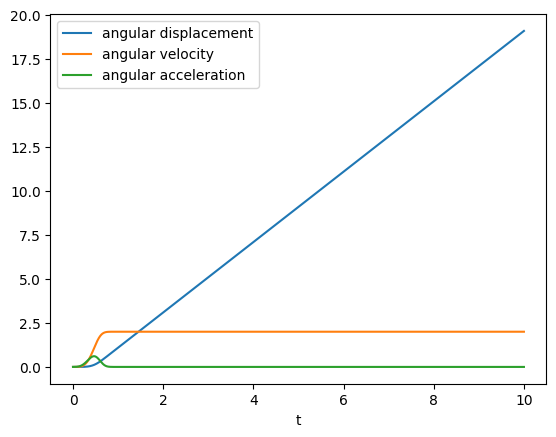

In [ ]:
t = np.linspace(0, time_limit, time_limit * 1000)

plt.plot(t, phi, label = "angular displacement")
plt.plot(t, dphi_dt, label = "angular velocity")
plt.plot(t, d2phi_dt2, label = "angular acceleration")

plt.xlabel("t")
plt.legend()
plt.show()

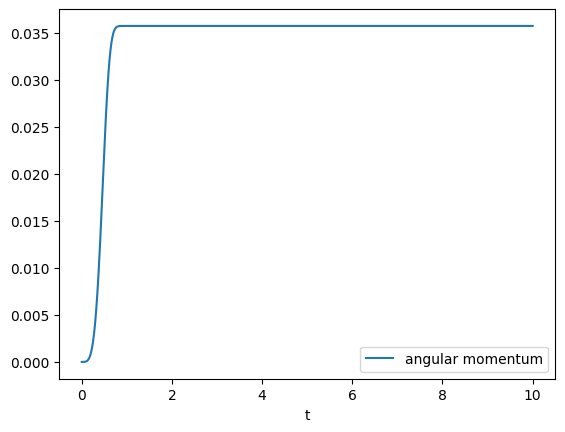

In [ ]:
angular_momentum = moment_of_inertia * dphi_dt
plt.plot(t, angular_momentum, label = "angular momentum")
plt.xlabel("t")
plt.legend()
plt.show()

Propeller moment of inertia

$$I_{prop} = \frac{3}{8} m R^2$$

In [ ]:
propeller_mass = 0.1 # unit kg
propeller_moment_of_inertia = (3/8) * propeller_mass * (radius**2)
print(propeller_moment_of_inertia)

0.0008437500000000001


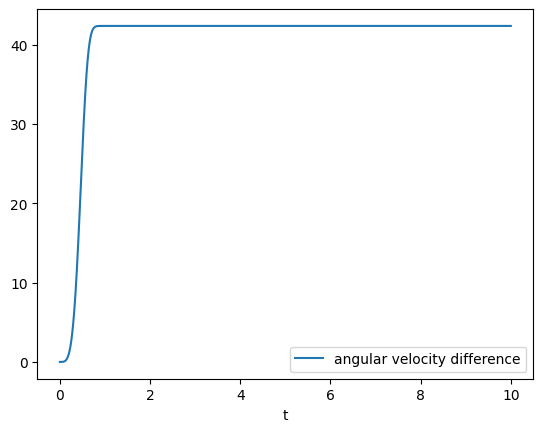

In [ ]:
omega_diff = angular_momentum / propeller_moment_of_inertia
plt.plot(t, omega_diff, label = "angular velocity difference")
plt.xlabel("t")
plt.legend()
plt.show()

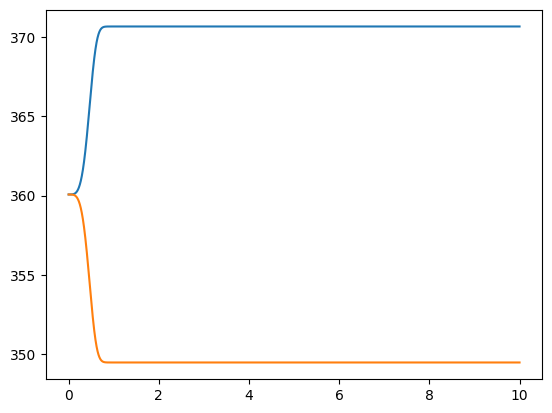

In [ ]:
omega1 = omega1[0] + omega_diff / 4
omega2 = omega2[0] - omega_diff / 4
omega3 = omega3[0] - omega_diff / 4
omega4 = omega4[0] + omega_diff / 4

plt.plot(t, omega1, label = "propeller 1 omega")
plt.plot(t, omega2, label = "propeller 2 omega")
plt.show()

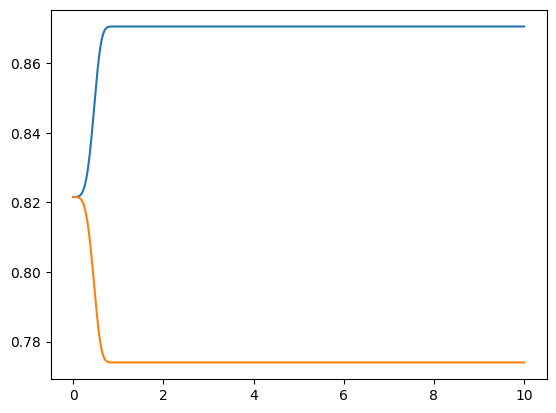

In [ ]:
L1 = find_lift(omega1)
L2 = find_lift(omega2)
L3 = find_lift(omega3)
L4 = find_lift(omega4)

plt.plot(t, L1)
plt.plot(t, L2)
plt.show()

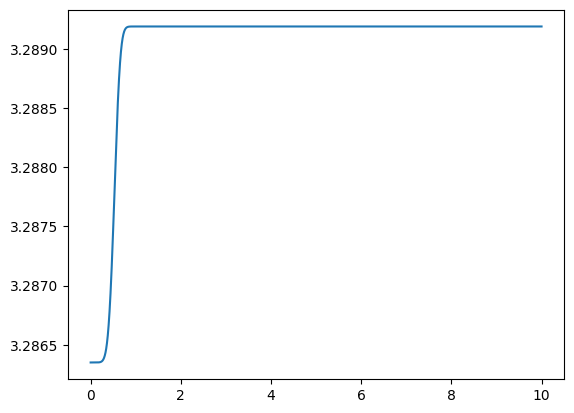

In [ ]:
L_total = L1 + L2 + L3 + L4
plt.plot(t, L_total)
plt.show()

# plotting 3d trajectory + loss of propeller

use spherical coordinates. x is left/right (row), y is front/back (pitch), z is up/down

$$L_x = L \sin{\theta} \cos{\phi}$$
$$L_y = L \sin{\theta} \sin{\phi}$$
$$L_z = L \cos{\theta}$$

use $F=ma$ to get trajectory in each axes. dont forget account for gravity for $z$-axis




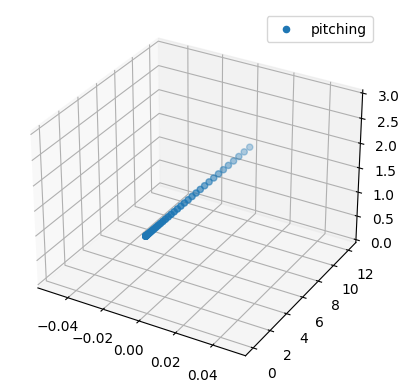

In [ ]:
#deprecated

ax = plt.figure().add_subplot(projection='3d')

vertical_accel = L_vertical / total_mass - 9.81
vertical_vel = np.cumsum(vertical_accel) * 0.001
vertical_displacement = np.cumsum(vertical_vel) * 0.001

t = np.linspace(0, time_limit, time_limit * 1000)
z = 1.5 + vertical_displacement
x = np.zeros(time_limit * 1000)
y = horizontal_displacement

ax.set_zlim(0, 3)

ax.scatter(x[::100], y[::100], z[::100], label='pitching')
ax.legend()

plt.show()

In [ ]:
def correct_lift(one, two, three, four, Ltotal, until):
  Lvert = Ltotal * np.cos(theta[:int(until)])
  L_correction = Ltotal - Lvert

  L1c, L2c = np.add(one, L_correction / 4), np.add(one, L_correction / 4)
  L3c, L4c = np.add(three, L_correction / 4), np.add(three, L_correction / 4)

  Ltotal_corrected = L1c + L2c + L3c + L4c

  return L1c, L2c, L3c, L4c, Ltotal_corrected

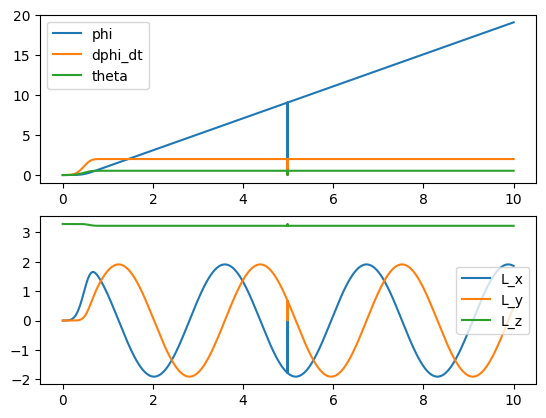

In [ ]:
t = 0
omega_diff = np.zeros(time_limit * 1000)
L_total = np.zeros(time_limit * 1000)
phi = np.zeros(time_limit * 1000)
dphi_dt = np.zeros(time_limit * 1000)
L_x = np.zeros(time_limit * 1000)
L_y = np.zeros(time_limit * 1000)
L_z = np.zeros(time_limit * 1000)

theta = np.zeros(time_limit * 1000)
theta_final = np.arcsin(pitch_accel / (total_lift / total_mass))

while t < time_limit:
  L_total[int(t*1000)] = L1[int(t*1000)] + L2[int(t*1000)] + L3[int(t*1000)] + L4[int(t*1000)]
  omega1[int(t*1000)] = find_omega_from_L(L1[int(t*1000)])
  omega2[int(t*1000)] = find_omega_from_L(L2[int(t*1000)])
  omega3[int(t*1000)] = find_omega_from_L(L3[int(t*1000)])
  omega4[int(t*1000)] = find_omega_from_L(L4[int(t*1000)])

  omega_diff[int(t*1000)] = omega1[int(t*1000)] + omega4[int(t*1000)] - omega2[int(t*1000)] - omega3[int(t*1000)]
  angular_momentum[int(t*1000)] = propeller_moment_of_inertia * omega_diff[int(t*1000)]
  dphi_dt[int(t*1000)] = angular_momentum[int(t*1000)] / moment_of_inertia

  phi[int(t*1000)] = np.sum(dphi_dt) * 0.001

  theta[int(t*1000)] = theta_final * (1 - np.exp(-(t/0.5)**4))

  L_x[int(t*1000)] = L_total[int(t*1000)] * np.sin(theta[int(t*1000)]) * np.cos(phi[int(t*1000)])
  L_y[int(t*1000)] = L_total[int(t*1000)] * np.sin(theta[int(t*1000)]) * np.sin(phi[int(t*1000)])
  L_z[int(t*1000)] = L_total[int(t*1000)] * np.cos(theta[int(t*1000)])

  t += 0.001

L1_c, L2_c, L3_c, L4_c, L_total_c = correct_lift(L1, L2, L3, L4, L_total, time_limit*1000)
L_x = L_total_c * np.sin(theta) * np.cos(phi)
L_y = L_total_c * np.sin(theta) * np.sin(phi)
L_z = L_total_c * np.cos(theta)

t = np.linspace(0, time_limit, time_limit * 1000)

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(t, phi, label = "phi")
ax1.plot(t, dphi_dt, label = "dphi_dt")
ax1.plot(t, theta, label = "theta")
ax2.plot(t, L_x, label = "L_x")
ax2.plot(t, L_y, label = "L_y")
ax2.plot(t, L_z, label = "L_z")
ax1.legend()
ax2.legend()
plt.savefig("angle and lift profiles.png")

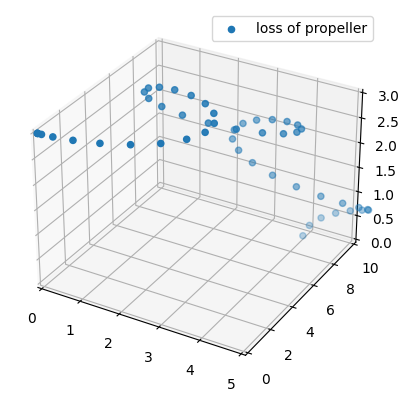

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

z_accel = L_z / total_mass - 9.81
z_vel = np.cumsum(z_accel) * 0.001
z_disp = np.cumsum(z_vel) * 0.001

y_accel = L_y / total_mass
y_vel = np.cumsum(y_accel) * 0.001
y_disp = np.cumsum(y_vel) * 0.001

x_accel = L_x / total_mass
x_vel = np.cumsum(x_accel) * 0.001
x_disp = np.cumsum(x_vel) * 0.001

t = np.linspace(0, time_limit, time_limit * 1000)
z = 3 + z_disp
x = x_disp
y = y_disp

ax.set_zlim(0, 3)
ax.set_xlim(0, 5)
ax.set_ylim(0, 10)

ax.scatter(x[::200], y[::200], z[::200], label='loss of propeller')
ax.legend()

plt.savefig("circular motion.png")

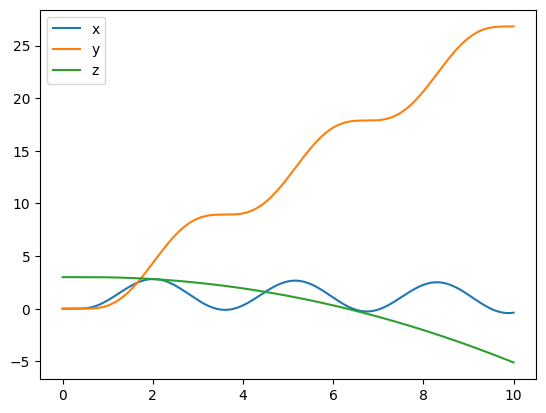

In [ ]:
plt.plot(t, x, label = 'x')
plt.plot(t, y, label = 'y')
plt.plot(t, z, label = 'z')
plt.legend()
plt.show()

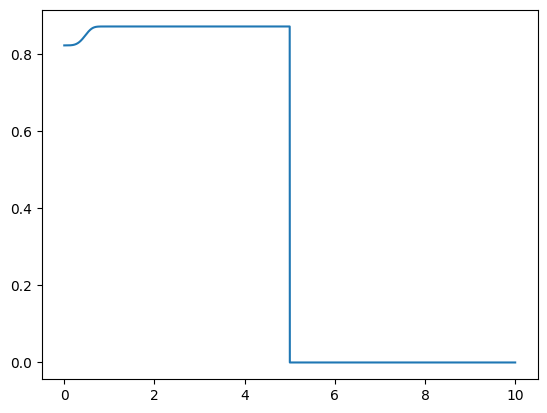

In [ ]:
omega4_loss = np.concatenate((omega4[0:int(time_limit * 500)], np.zeros(int(time_limit * 500))), axis=None)
L4_loss = find_lift(omega4_loss)
plt.plot(t, L4_loss)
plt.show()

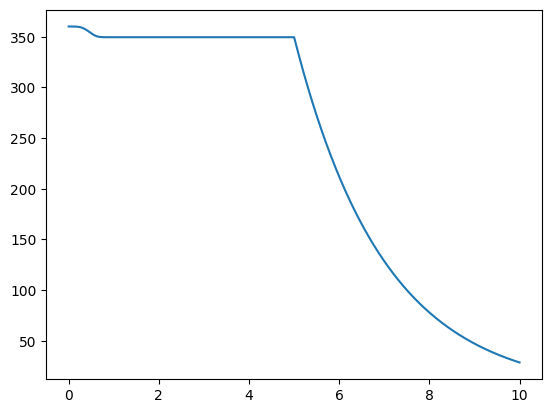

In [ ]:
#OR: loss of motor: propeller slowly stops spinning

omega_slowdown = np.full(time_limit * 500, omega3[time_limit * 500])

t = 0
while t < (time_limit * 0.5):
  if t == 0:
    pass
  else:
    omega_slowdown[int(t*1000)] = omega_slowdown[int(t*1000) - 1] * 0.9995
  t += 0.001

omega_slowdown[4985:] = np.zeros(15)
t = 4.985
while t < (time_limit * 0.5):
  omega_slowdown[int(t*1000)] = omega_slowdown[int(t*1000) - 1] * 0.9995
  t += 0.001

omega_loss = np.concatenate((omega3[0:int(time_limit * 500)], omega_slowdown), axis=None)

L_loss = find_lift(omega_loss)
plt.plot(np.linspace(0, time_limit, time_limit*1000), omega_loss)
plt.show()

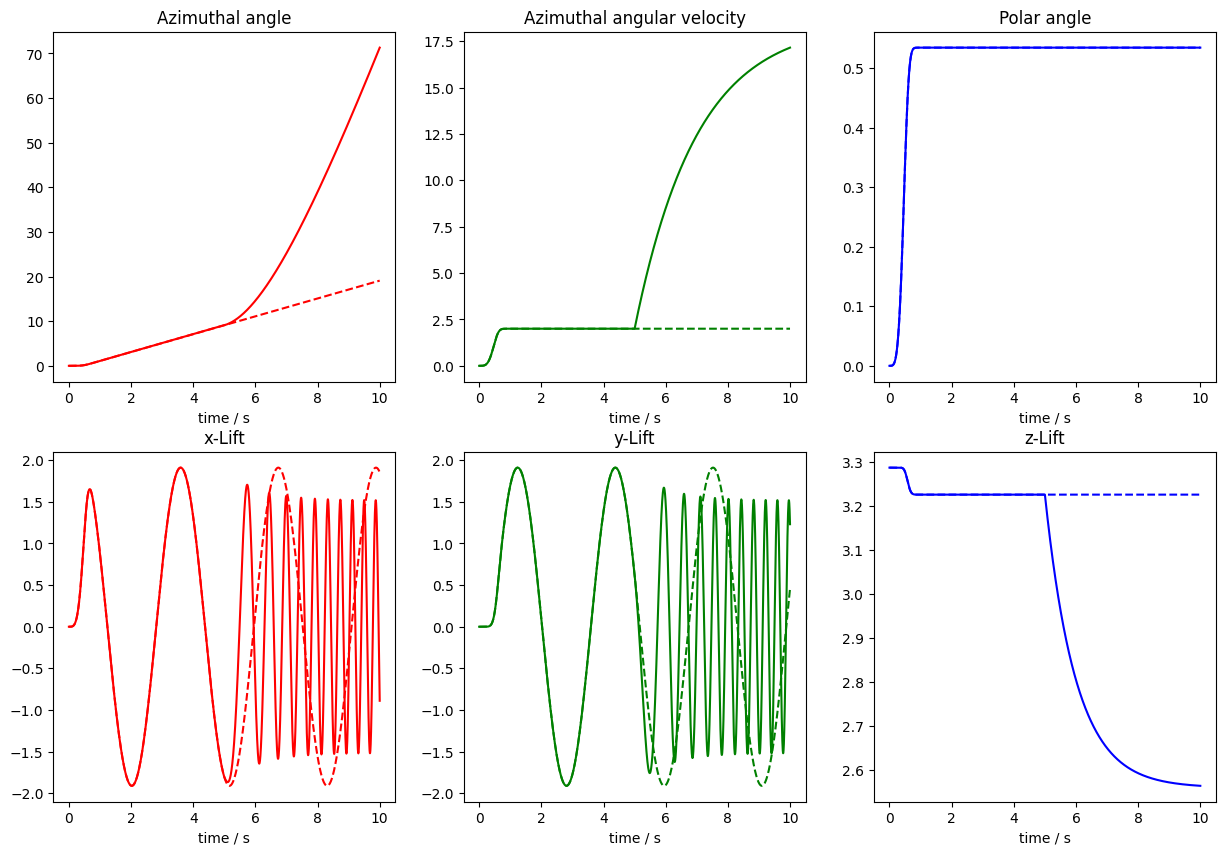

In [ ]:
t = 0
omega_diff_loss = np.zeros(time_limit * 1000)
L_total_loss = np.zeros(time_limit * 1000)
phi_loss = np.zeros(time_limit * 1000)
dphi_dt_loss = np.zeros(time_limit * 1000)
L_x_loss = np.zeros(time_limit * 1000)
L_y_loss = np.zeros(time_limit * 1000)
L_z_loss = np.zeros(time_limit * 1000)
angular_momentum_loss = np.zeros(time_limit * 1000)

theta_loss = np.zeros(time_limit * 1000)
theta_final = np.arcsin(pitch_accel / (total_lift / total_mass))

while t < time_limit:
  L_total_loss[int(t*1000)] = L1[int(t*1000)] + L2[int(t*1000)] + L_loss[int(t*1000)] + L4[int(t*1000)]
  omega1[int(t*1000)] = find_omega_from_L(L1[int(t*1000)])
  omega2[int(t*1000)] = find_omega_from_L(L2[int(t*1000)])
  omega4[int(t*1000)] = find_omega_from_L(L4[int(t*1000)])

  omega_diff_loss[int(t*1000)] = omega1[int(t*1000)] + omega4[int(t*1000)] - omega2[int(t*1000)] - omega_loss[int(t*1000)]
  angular_momentum_loss[int(t*1000)] = propeller_moment_of_inertia * omega_diff_loss[int(t*1000)]
  dphi_dt_loss[int(t*1000)] = angular_momentum_loss[int(t*1000)] / moment_of_inertia

  phi_loss[int(t*1000)] = np.sum(dphi_dt_loss) * 0.001

  theta_loss[int(t*1000)] = theta_final * (1 - np.exp(-(t/0.5)**4))

  L_x_loss[int(t*1000)] = L_total_loss[int(t*1000)] * np.sin(theta_loss[int(t*1000)]) * np.cos(phi_loss[int(t*1000)])
  L_y_loss[int(t*1000)] = L_total_loss[int(t*1000)] * np.sin(theta_loss[int(t*1000)]) * np.sin(phi_loss[int(t*1000)])
  L_z_loss[int(t*1000)] = L_total_loss[int(t*1000)] * np.cos(theta_loss[int(t*1000)])

  t += 0.001

L1_cl, L2_cl, L3_cl, L4_cl, L_total_cl = correct_lift(
    L1[:time_limit * 500], L2[:time_limit * 500], L_loss[:time_limit * 500], L4[:time_limit * 500], L_total_loss[:time_limit * 500], time_limit*500
)
L_total_cl = np.concatenate((L_total_cl, L_total_loss[time_limit * 500:] + (np.max(L_total_cl) - np.max(L_total_loss))), axis=None)
L_x_loss = L_total_cl * np.sin(theta_loss) * np.cos(phi_loss)
L_y_loss = L_total_cl * np.sin(theta_loss) * np.sin(phi_loss)
L_z_loss = L_total_cl * np.cos(theta_loss)

# clean up
phi_loss[4985] = (phi_loss[4984] + phi_loss[4986]) / 2
dphi_dt_loss[4985] = (dphi_dt_loss[4984] + dphi_dt_loss[4986]) / 2

theta_loss[4985] = (theta_loss[4984] + theta_loss[4986]) / 2
theta[4985] = (theta[4984] + theta[4986]) / 2

L_x_loss[4985] = (L_x_loss[4984] + L_x_loss[4986]) / 2
L_x[4985] = (L_x[4984] + L_x[4986]) / 2

L_y_loss[4985] = (L_y_loss[4984] + L_y_loss[4986]) / 2
L_y[4985] = (L_y[4984] + L_y[4986]) / 2

L_z_loss[4985] = (L_z_loss[4984] + L_z_loss[4986]) / 2
L_z[4985] = (L_z[4984] + L_z[4986]) / 2

# plotting

t = np.linspace(0, time_limit, time_limit * 1000)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].plot(t, phi, linestyle='dashed', color='r')
axs[0, 0].plot(t, phi_loss, label = "phi", color='r')
axs[0, 0].set_title('Azimuthal angle')

axs[0, 1].plot(t, dphi_dt, linestyle='dashed', color='g')
axs[0, 1].plot(t, dphi_dt_loss, label = "dphi_dt", color='g')
axs[0, 1].set_title('Azimuthal angular velocity')

axs[0, 2].plot(t, theta, linestyle='dashed', color='b')
axs[0, 2].plot(t, theta_loss, label = "theta", color='b')
axs[0, 2].set_title('Polar angle')

axs[1, 0].plot(t, L_x, linestyle='dashed', color='r')
axs[1, 0].plot(t, L_x_loss, label = "L_x", color='r')
axs[1, 0].set_title('x-Lift')

axs[1, 1].plot(t, L_y, linestyle='dashed', color='g')
axs[1, 1].plot(t, L_y_loss, label = "L_y", color='g')
axs[1, 1].set_title('y-Lift')

axs[1, 2].plot(t, L_z, linestyle='dashed', color='b')
axs[1, 2].plot(t, L_z_loss, label = "L_z", color='b')
axs[1, 2].set_title('z-Lift')

for ax in axs.flat:
    ax.set(xlabel='time / s')

plt.savefig("Angles and Lifts.png")

In [ ]:
dphi_dt_loss[9980:]

array([17.13681126, 17.13749502, 17.13817844, 17.13886152, 17.13954425,
        9.57389718,  2.0082501 ,  2.01650021,  2.02474412,  2.03298392,
        2.04121959,  2.04945115,  2.05767859,  2.06590192,  2.07412113,
        2.08233624,  2.09054724,  2.09875413,  2.10695692,  2.11515561])

In [ ]:
np.where(dphi_dt_loss[9000:] == np.min(dphi_dt_loss[9000:]))

(array([986]),)

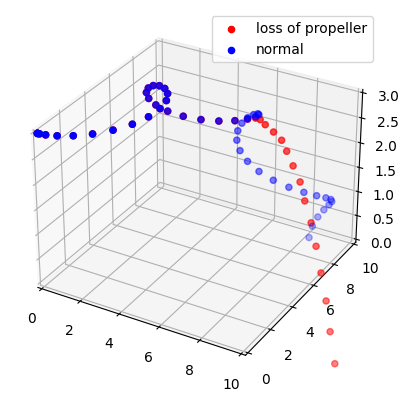

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

z_accel_loss = L_z_loss / total_mass - 9.81
z_vel_loss = np.cumsum(z_accel_loss) * 0.001
z_disp_loss = np.cumsum(z_vel_loss) * 0.001

y_accel_loss = L_y_loss / total_mass
y_vel_loss = np.cumsum(y_accel_loss) * 0.001
y_disp_loss = np.cumsum(y_vel_loss) * 0.001

x_accel_loss = L_x_loss / total_mass
x_vel_loss = np.cumsum(x_accel_loss) * 0.001
x_disp_loss = np.cumsum(x_vel_loss) * 0.001

t = np.linspace(0, time_limit, time_limit * 1000)
z_loss = 3 + z_disp_loss
x_loss = x_disp_loss
y_loss = y_disp_loss

ax.set_zlim(0, 3)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.scatter(x_loss[::200], y_loss[::200], z_loss[::200], label='loss of propeller', color='r')
ax.scatter(x[::200], y[::200], z[::200], label='normal', color='b')
ax.legend()

plt.savefig("trajectory.png")

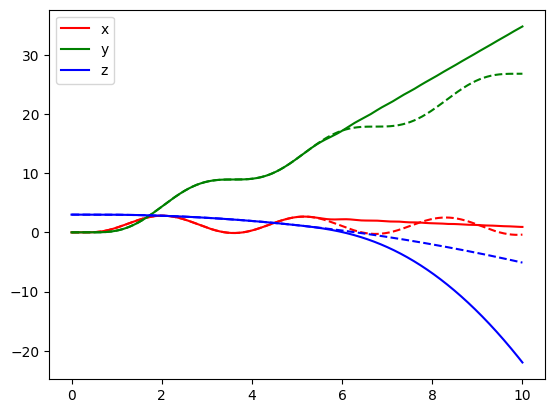

In [ ]:
plt.plot(t, x_loss, label = 'x', color='r')
plt.plot(t, x, linestyle='dashed', color='r')
plt.plot(t, y_loss, label = 'y', color='g')
plt.plot(t, y, linestyle='dashed', color='g')
plt.plot(t, z_loss, label = 'z', color='b')
plt.plot(t, z, linestyle='dashed', color='b')
plt.legend()
plt.savefig("components.png")

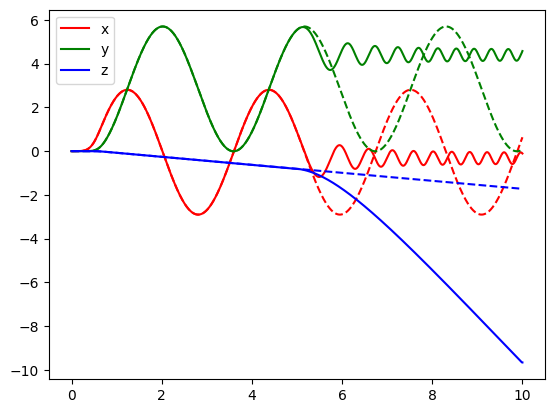

In [ ]:
plt.plot(t, x_vel_loss, label = 'x', color='r')
plt.plot(t, x_vel, linestyle='dashed', color='r')
plt.plot(t, y_vel_loss, label = 'y', color='g')
plt.plot(t, y_vel, linestyle='dashed', color='g')
plt.plot(t, z_vel_loss, label = 'z', color='b')
plt.plot(t, z_vel, linestyle='dashed', color='b')
plt.legend()
plt.savefig("components velocity.png")

# Animation????

In [ ]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython==8.21.0

In [ ]:
from manim import *

In [ ]:
def x_func(u):
  return x[int(u*1000)]

def y_func(u):
  return y[int(u*1000)]

def z_func(u):
  return z[int(u*1000)]

def x_loss_func(u):
  return x_loss[int(u*1000)]

def y_loss_func(u):
  return y_loss[int(u*1000)]

def z_loss_func(u):
  return z_loss[int(u*1000)]

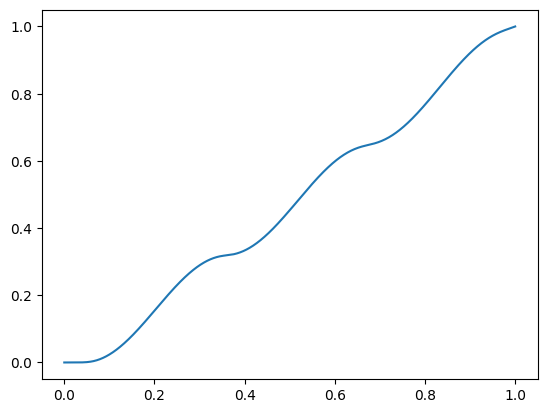

In [ ]:
s = np.zeros(time_limit*1000)
ds = np.zeros(time_limit*1000)
dx = np.zeros(time_limit*1000)
dy = np.zeros(time_limit*1000)
dz = np.zeros(time_limit*1000)

t = 0.001
while t < time_limit:
  dx[int(t*1000)] = (x[int(t*1000)] - x[int(t*1000) - 1])
  dy[int(t*1000)] = (y[int(t*1000)] - y[int(t*1000) - 1])
  dz[int(t*1000)] = (z[int(t*1000)] - z[int(t*1000) - 1])
  ds[int(t*1000)] = np.sqrt(dx[int(t*1000)]**2 + dy[int(t*1000)]**2 + dz[int(t*1000)]**2)
  s[int(t*1000)] = np.sum(ds)
  t += 0.001

physics_rate = np.divide(s, np.max(s))

physics_rate = physics_rate[::time_limit]

physics_rate = np.append(physics_rate, 1)

plt.plot(np.linspace(0, 1, 1001), physics_rate)
plt.show()

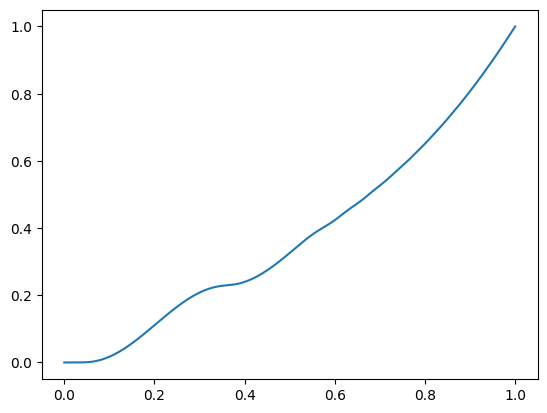

In [ ]:
s_loss = np.zeros(time_limit*1000)
ds_loss = np.zeros(time_limit*1000)
dx_loss = np.zeros(time_limit*1000)
dy_loss = np.zeros(time_limit*1000)
dz_loss = np.zeros(time_limit*1000)

t = 0.001
while t < time_limit:
  dx_loss[int(t*1000)] = (x_loss[int(t*1000)] - x_loss[int(t*1000) - 1])
  dy_loss[int(t*1000)] = (y_loss[int(t*1000)] - y_loss[int(t*1000) - 1])
  dz_loss[int(t*1000)] = (z_loss[int(t*1000)] - z_loss[int(t*1000) - 1])
  ds_loss[int(t*1000)] = np.sqrt(np.square(dx_loss[int(t*1000)]) + np.square(dy_loss[int(t*1000)]) + np.square(dz_loss[int(t*1000)]))
  s_loss[int(t*1000)] = np.sum(ds_loss)
  t += 0.001

loss_physics_rate = np.divide(s_loss, np.max(s_loss))

loss_physics_rate = loss_physics_rate[::time_limit]

loss_physics_rate = np.append(loss_physics_rate, 1)

plt.plot(np.linspace(0, 1, 1001), loss_physics_rate)
plt.show()

In [ ]:
def normal_rate_function(t: float) -> float:
  return physics_rate[int(t*1000)]

def loss_rate_function(t: float) -> float:
  return loss_physics_rate[int(t*1000)]

In [ ]:
%%manim -qm -v WARNING Trajectory

class Trajectory(ThreeDScene):
    def ground(self, u, v):
        return np.array([u, v, 0])

    def normal_path(self, u):
        return np.array([x_func(u), y_func(u), z_func(u)])

    def loss_path(self, u):
        return np.array([x_loss_func(u), y_loss_func(u), z_loss_func(u)])

    def construct(self):
        axes = ThreeDAxes(x_range=(-25, 25, 1), y_range=(-25, 25, 1), z_range=(-15, 15, 1))

        labels = axes.get_axis_labels(x_label=Tex("x"), y_label=Tex("y"), z_label=Tex("z"))

        d1 = Dot3D(point=axes.coords_to_point(0, 0, 3), color=RED)
        d2 = Dot3D(point=axes.coords_to_point(0, 0, 3), color=BLUE)

        ground = Surface(lambda u, v: axes.c2p(*self.ground(u, v)),
            u_range=[-15, 15],
            v_range=[-15, 15],
            resolution=8, fill_opacity=0.5, color=WHITE
        )

        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES, zoom=1)

        self.add(axes, labels, ground)

        # built-in updater which begins camera rotation
        self.begin_ambient_camera_rotation(rate=0.1)

        self.wait(1)

        curve1 = ParametricFunction(lambda t: axes.c2p(*self.normal_path(t)),
            color=RED, t_range = (0, time_limit - 0.001, 0.001)
        ).set_shade_in_3d(True)

        curve2 = ParametricFunction(lambda t: axes.c2p(*self.loss_path(t)),
            color=BLUE, t_range = (0, time_limit - 0.001, 0.001)
        ).set_shade_in_3d(True)

        self.play(FadeIn(d1), FadeIn(curve1))
        self.wait(1)

        self.play(
            MoveAlongPath(d1, curve1, rate_func=normal_rate_function),
            run_time = time_limit
        )

        self.wait(2)
        self.play(FadeOut(d1))
        self.play(FadeIn(d2), FadeIn(curve2))
        self.wait(1)

        self.play(
            MoveAlongPath(d2, curve2, rate_func=loss_rate_function),
            run_time = time_limit
        )

        self.wait(1)

Manim Community v0.18.1

In [ ]:
%%manim -qm -v WARNING Timer

class Timer(ThreeDScene):
    def construct(self):
        timer = Tex("Time / s: ")
        time = DecimalNumber(0).next_to(timer, RIGHT)
        group = VGroup(timer, time).move_to(ORIGIN)

        self.play(FadeIn(group), run_time=1)
        self.play(ChangeDecimalToValue(time, time_limit), rate_func=linear, run_time = time_limit)
        self.wait(1)

Manim Community v0.18.1

In [ ]:
def phi_loss_function(u):
  return phi_loss[int(u*1000)]

def phi_function(u):
  return phi[int(u*1000)]

In [ ]:
%%manim -qm -v WARNING Phi

class Phi(Scene):
    def construct(self):
        polarplane_pi = PolarPlane(
            azimuth_units="PI radians",
            size=4,
            azimuth_label_font_size=22.4,
            radius_config={"font_size": 22.4},
        ).add_coordinates(r_values = [])

        time = DecimalNumber(0, fill_opacity = 0)

        result = VGroup()
        vector = always_redraw(lambda: Vector(polarplane_pi.polar_to_point(4, phi_function(time.get_value()))))
        phi_label = Tex("Azimuthal Angle $\phi$").next_to(polarplane_pi, UP + LEFT)

        self.play(FadeIn(polarplane_pi), FadeIn(vector), FadeIn(phi_label))
        self.wait(1)
        self.play(ChangeDecimalToValue(time, time_limit - 0.001), rate_func=linear, run_time = time_limit)
        self.wait(1)


Manim Community v0.18.1